# Predicting Diabetes Onset
### By: Bethany Thompson
### Date: December 2020
## Goals
- Create a machine learning algorithm to predict if a patient has diabetes or not  

## Conclusions
- Major Takeaways:
- Final Model Selected:
- Model Metrics:
- Next Steps:

## How to Reproduce:
- [ ] Go over the Readme.md file in the repository of this project [here](https://github.com/ThompsonBethany01/Predicting-Diabetes-Onset).
- [ ] Download Data_Analysis.ipynb and the dataset in your working directory.
- [ ] Run the notebook.

## Thought Process
The predictive variable is the patient being diabetic or not, 0 or 1, making it a classification problem. With a classification problem:
- we create algorithms based on the labeled outcome variable
- this produces a decision rule to classify future data with
- we generalize the trends/patterns in the data to predict the future/unseen data

# Table of Contents <a class="anchor" id="top"></a>
1. [Acquire](#acquire)
2. [Prepare](#prepare)
3. [Explore](#explore)
4. [Modeling](#model)
5. [Final Conclusions](#fin)

In [1]:
# initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Acquire <a class="anchor" id="acquire"></a>
Dataset from UCI Machine Learning via Kaggle [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database) saved in .csv file  
#### Steps:
- read csv file into df
- summarize data
- create data dictionary

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


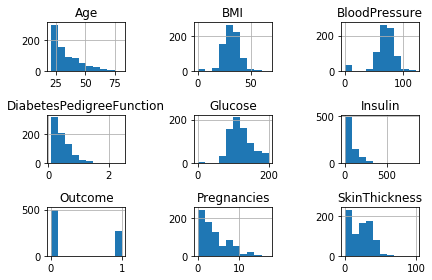

In [7]:
df.hist()
plt.tight_layout()

In [8]:
#for column in df.columns:
#    print(column)
#    print(df[column].value_counts())
#    print('')

In [9]:
# checking observations with 0 for glucose
df[(df.BloodPressure == 0)&(df.BMI == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


### Takeaways
768 observations  
- 8 columns and 1 predictive column as diabetic or not  

All numeric values, integers or floats  
- average diabetic diagnosis is 0, non-diabetic  
- all continuous features except pregnancies and outcome which are discrete  

No null values  
- observations with 0 for values that cannot be, such as BMI and Blood Pressure, have 0 for multiple features  
    - could be null values that were replaced with 0

[Table of Contents](#top)

# Prepare <a class="anchor" id="prepare"></a>
For Exploration:
- create new features by bining demographics 
    - age into 20s, 30s, etc
    - bmi into low, middle, high
    - blood pressure into low, good, high

For Modeling:
- scale the data
- determine if outliers/anomalies to remove
- split into train, valideate, test
- create features based on clustering

In [10]:
# removing observations with a 0 for both BMI and BloodPressure
df = df[~((df.BloodPressure == 0) & (df.BMI == 0))]

### Feature Engineering
- binning features

In [11]:
# 1 = 'early_20s', 2 = 'late_20s', 3 = '30s', 4 = '40s_to_80s']
# (20.999, 24.0] < (24.0, 29.0] < (29.0, 41.0] < (41.0, 81.0]
df['age_bins'] = pd.qcut(df.Age, 4, labels=[1,2,3,4])

In [12]:
# 1 = low, 2 = medium, 3 = high
# (-0.001, 29.0] < (29.0, 34.867] < (34.867, 67.1]
df['bmi_bins'] = pd.qcut(df.BMI, 3, labels=[1,2,3])

In [13]:
# 1 = low, 2 = medium, 3 = high
# (-0.001, 66.0] < (66.0, 76.0] < (76.0, 122.0]
df['bp_bins'] = pd.qcut(df.BloodPressure, 3, labels=[1,2,3])

### Splitting Data
- 70% train
- 20% validate
- 10% test

In [14]:
# Import to use split function, can only split two at a time
from sklearn.model_selection import train_test_split

# First, split into train + validate together and test by itself
# Test will be %10 of the data, train + validate is %70 for now
# Set random_state so we can reproduce the same 'random' data
train_validate, test = train_test_split(df, test_size = .10, random_state = 123)

# Second, we split train + validate into their seperate variables
# Train will be %70 of the data, Validate will be %20 of the data
train, validate = train_test_split(train_validate, test_size = .22, random_state = 123)

# These two print functions allow us to ensure the date is properly split
# Will print the shape of each variable when running the function
print("train shape: ", train.shape, ", validate shape: ", validate.shape, ", test shape: ", test.shape)

# Will print the shape of eachvariable as a percentage of the total data set
# Varialbe to hold the sum of all rows (total observations in the data)
total = df.count()[0]
print("\ntrain percent: ", round(((train.shape[0])/total),2) * 100, 
        ", validate percent: ", round(((validate.shape[0])/total),2) * 100, 
        ", test percent: ", round(((test.shape[0])/total),2) * 100)

train shape:  (533, 12) , validate shape:  (151, 12) , test shape:  (77, 12)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [15]:
train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins,bmi_bins,bp_bins
400,4,95,64,0,0,32.0,0.161,31,1,3,2,1
610,3,106,54,21,158,30.9,0.292,24,0,1,2,1
116,5,124,74,0,0,34.0,0.220,38,1,3,2,2
231,6,134,80,37,370,46.2,0.238,46,1,4,3,3
261,3,141,0,0,0,30.0,0.761,27,1,2,2,1


### Scaling the Data Using Min-Max Scaler
- transforms the range of data points to 0 - 1

In [16]:
# splitting into X and y
X_train = train.drop('Outcome', axis=1)
X_validate = validate.drop('Outcome', axis=1)
X_test = test.drop('Outcome', axis=1)

In [17]:
import sklearn.preprocessing

# create object
scaler = sklearn.preprocessing.MinMaxScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [18]:
# converting scaled array baack to df
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.index = X_train.index
X_train_scaled.columns = X_train.columns

X_validate_scaled = pd.DataFrame(X_validate_scaled)
X_validate_scaled.index = X_validate.index
X_validate_scaled.columns = X_validate.columns

X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.index = X_test.index
X_test_scaled.columns = X_test.columns

In [19]:
X_train_scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_bins,bmi_bins,bp_bins
400,0.266667,0.479798,0.524590,0.000000,0.000000,0.538721,0.035440,0.196078,0.666667,0.5,0.0
610,0.200000,0.535354,0.442623,0.212121,0.212366,0.520202,0.091375,0.058824,0.000000,0.5,0.0
116,0.333333,0.626263,0.606557,0.000000,0.000000,0.572391,0.060632,0.333333,0.666667,0.5,0.5
231,0.400000,0.676768,0.655738,0.373737,0.497312,0.777778,0.068318,0.490196,1.000000,1.0,1.0
261,0.200000,0.712121,0.000000,0.000000,0.000000,0.505051,0.291631,0.117647,0.333333,0.5,0.0


### Creating Clusters on Scaled Data
- age and bmi bins to create one cluster

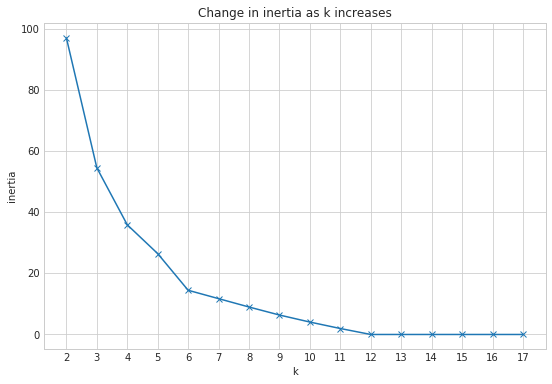

In [20]:
from sklearn.cluster import KMeans

# features to predict cluster on, only fitting model on X(train)
X = X_train_scaled[['age_bins','bmi_bins']]
Y = X_validate_scaled[['age_bins','bmi_bins']]
Z = X_test_scaled[['age_bins','bmi_bins']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 4 clusters

##### Creating the First Cluster based on the Scaled Data and Adding to the Unscaled and Scaled DF's

In [21]:
# create object with 4 clusters
kmeans = KMeans(n_clusters=4)

# fit to the features chosen
kmeans.fit(X)

# predict clusters 
kmeans.predict(X)

# add column in unscaled df of these cluster predictions
train['age_bmi_cluster'] = kmeans.predict(X)
validate['age_bmi_cluster'] = kmeans.predict(Y)
test['age_bmi_cluster'] = kmeans.predict(Z)

# add column in scaled df of these cluster predictions
X_train_scaled['age_bmi_cluster'] = kmeans.predict(X)
X_validate_scaled['age_bmi_cluster'] = kmeans.predict(Y)
X_test_scaled['age_bmi_cluster'] = kmeans.predict(Z)

##### Rescaling the DF's to also scale the new cluster created

In [22]:
# splitting into X and y
X_train = train.drop('Outcome', axis=1)
X_validate = validate.drop('Outcome', axis=1)
X_test = test.drop('Outcome', axis=1)

# create object
scaler = sklearn.preprocessing.MinMaxScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

# converting scaled array baack to df
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.index = X_train.index
X_train_scaled.columns = X_train.columns

X_validate_scaled = pd.DataFrame(X_validate_scaled)
X_validate_scaled.index = X_validate.index
X_validate_scaled.columns = X_validate.columns

X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.index = X_test.index
X_test_scaled.columns = X_test.columns

In [23]:
X_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,age_bins,bmi_bins,bp_bins,age_bmi_cluster
400,0.266667,0.479798,0.524590,0.000000,0.000000,0.538721,0.035440,0.196078,0.666667,0.5,0.0,1.000000
610,0.200000,0.535354,0.442623,0.212121,0.212366,0.520202,0.091375,0.058824,0.000000,0.5,0.0,0.333333
116,0.333333,0.626263,0.606557,0.000000,0.000000,0.572391,0.060632,0.333333,0.666667,0.5,0.5,1.000000
231,0.400000,0.676768,0.655738,0.373737,0.497312,0.777778,0.068318,0.490196,1.000000,1.0,1.0,0.000000
261,0.200000,0.712121,0.000000,0.000000,0.000000,0.505051,0.291631,0.117647,0.333333,0.5,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.666667,0.616162,0.639344,0.313131,0.000000,0.464646,0.185312,0.470588,1.000000,0.0,1.0,1.000000
394,0.266667,0.797980,0.639344,0.000000,0.000000,0.553872,0.309564,0.196078,0.666667,0.5,1.0,1.000000
64,0.466667,0.575758,0.540984,0.000000,0.000000,0.552189,0.076857,0.411765,1.000000,0.5,0.0,1.000000
748,0.200000,0.944444,0.573770,0.222222,0.268817,0.612795,0.140905,0.294118,0.666667,1.0,0.5,0.000000


### Takeaways
- removed observations that had 0 for BMI and BP, these observations had other 0 values as well and were note useful for exploration and modeling
- added new features based on binning continuous features

### Next Steps
- deal with observations that are 0 which cannot be 0, such as glucose and BMI
- create clusters
- scale the data for modeling
- put work into a prepare.py module and clean up the code in the notebook

[Table of Contents](#top)

# Explore <a class="anchor" id="explore"></a>
- determine trends in patient being diabetic or not
- test the significance with hypothesis testing
- explore interaction of independent features to determine what clusters to create

Text(0, 0.5, 'Count of Patients')

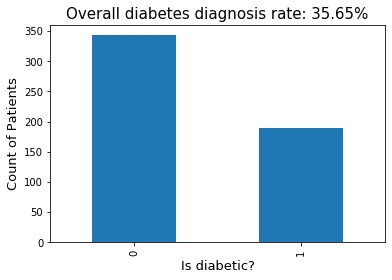

In [24]:
train.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = train.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=15)
plt.xlabel('Is diabetic?', size=13)
plt.ylabel('Count of Patients', size=13)

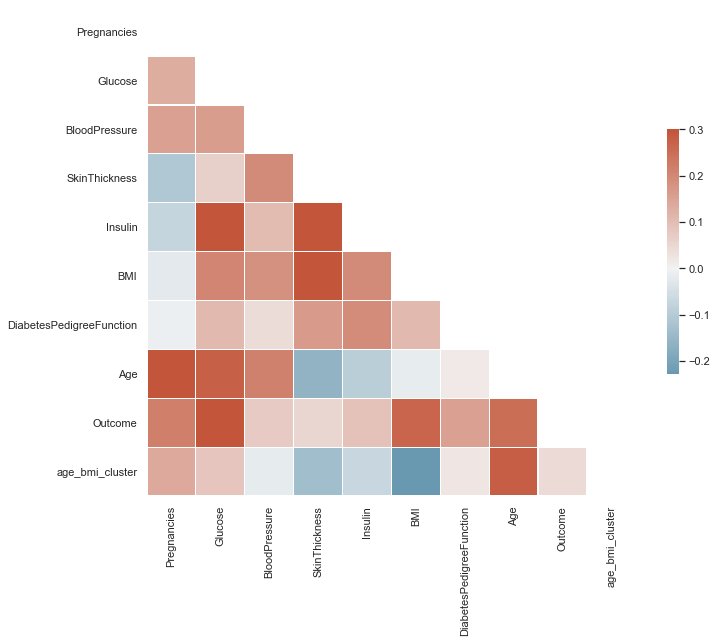

In [25]:
corr = train.corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Looking at Independent Features vs. Diabetic Outcome

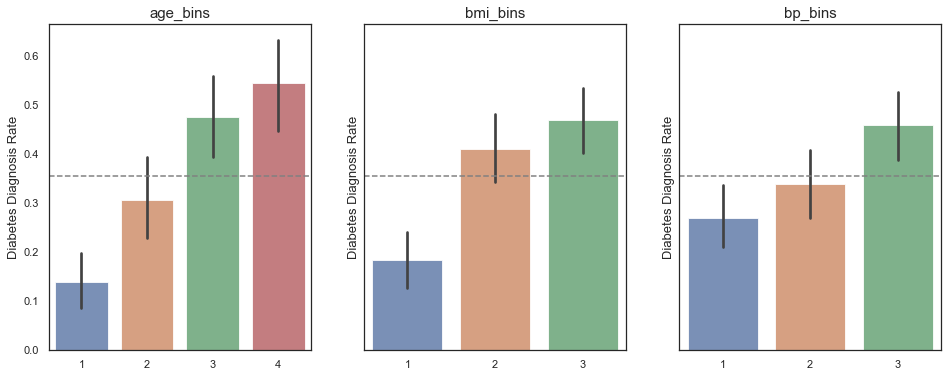

In [26]:
# categorical features we can compare
features = ['age_bins', 'bmi_bins', 'bp_bins']

# overall diagnosis of diabetes on whole train df
diabetic_rate = train.Outcome.mean()

# plotting subgroups diagnosis rate and comparing to overal with dashed line
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'Outcome', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Diabetes Diagnosis Rate', size=13)
    ax[i].set_title(feature, size=15)
    ax[i].axhline(diabetic_rate, ls='--', color='grey')

Text(0.5, 1.0, 'Diabetes Diagnosis by Age and BMI')

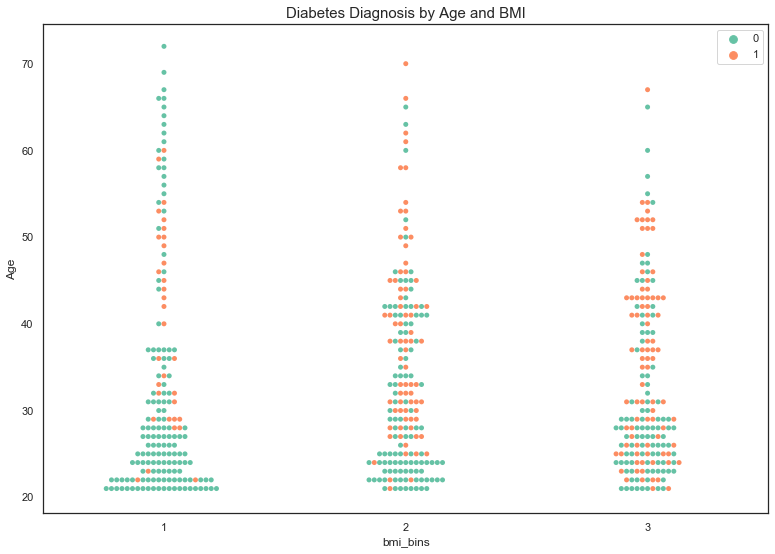

In [27]:
plt.figure(figsize=(13,9))
sns.swarmplot(x="bmi_bins", y="Age", data=train, hue="Outcome", palette="Set2")
plt.legend()
plt.title('Diabetes Diagnosis by Age and BMI', size=15)

Text(0.5, 1, 'Diabetes Diagnosis with BMI vs. Glucose')

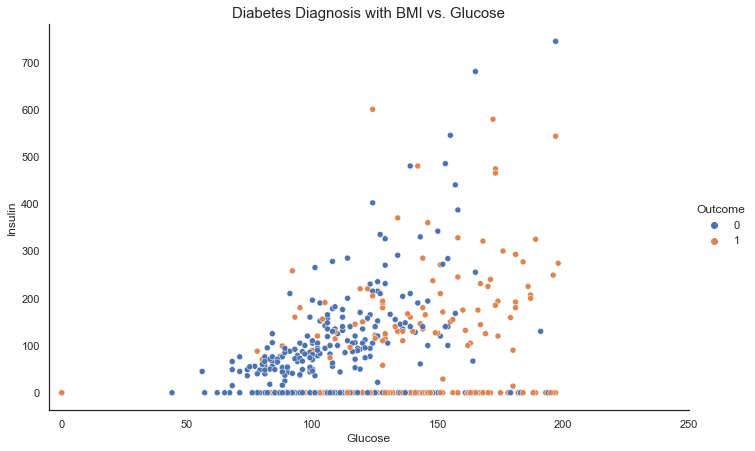

In [28]:
sns.relplot(x="Glucose", y="Insulin", hue="Outcome", data=train, height=6, aspect=1.6)
plt.xlim(-5, 250)
plt.title('Diabetes Diagnosis with BMI vs. Glucose', size=15)

### Exploring Interaction of X Variables

In [29]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'age_bins', 'bmi_bins',
       'bp_bins', 'age_bmi_cluster'],
      dtype='object')

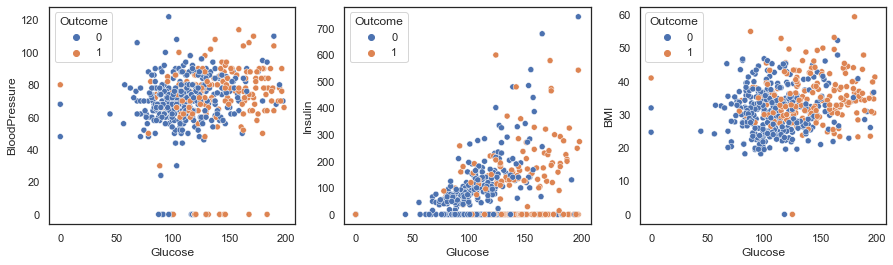

In [30]:
plt.figure(figsize=(15,4))

plt.subplot(131)
sns.scatterplot(x=train.Glucose, y=train.BloodPressure, hue=train.Outcome)

plt.subplot(132)
sns.scatterplot(x=train.Glucose, y=train.Insulin, hue=train.Outcome)

plt.subplot(133)
sns.scatterplot(x=train.Glucose, y=train.BMI, hue=train.Outcome)

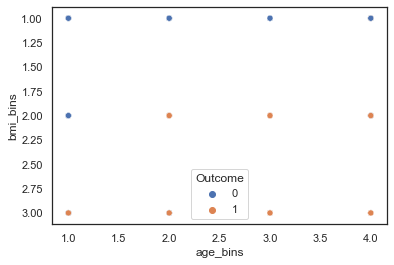

In [31]:
sns.scatterplot(x=train.age_bins, y=train.bmi_bins, hue=train.Outcome)

### Takeaways


### Next Steps
- create clusters for new features based on BMI, age, etc.
- bin more continuous variables

[Table of Contents](#top)

# Modeling <a class="anchor" id="model"></a>
##### Outcome of patient being diabetic or not is the predictive feature, Y
#### Steps
1. Create the Baseline model for comparison based on most common diagnosis
2. Create models fit to the train df only
3. Validate on top 3 models, tuning hyperparameters
4. Use final top model evaluated on test
5. Determine next steps/conclusions

### Baseline

In [32]:
train.Outcome.value_counts()

0    343
1    190
Name: Outcome, dtype: int64

Text(0, 0.5, 'Count of Patients')

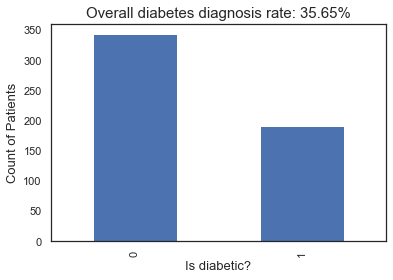

In [33]:
# taking a look at the same barplot again, overall rate of diabetes diagnosis
train.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = train.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=15)
plt.xlabel('Is diabetic?', size=13)
plt.ylabel('Count of Patients', size=13)

In [34]:
# most common diagnosis is non-diabetic, this will be our baseline
train['baseline_prediction'] = 0

baseline_accuracy = (train.baseline_prediction == train.Outcome).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 64.35%


## Creating Classification Models
#### Models to Create
- LogisticRegression
- DecisionTree
- RandomForest
- KNN

#### Primary Evaluation Metric
Is it more dangerous to predict diabetic when actually not, or not diabetic when actually diabetic? 

In [75]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
# splitting into X and y
X_train = X_train_scaled
y_train = train[['Outcome']]

## Creating Models on Train
- What features are most important in the model?

In [37]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features to select
rfe = RFE(lm, 6)

# fit the data using RFE
rfe.fit(X_train_scaled,y_train.Outcome)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [52]:
# Features elected by SelectKBest
print('SelectKBest Top 6 Features:')
rfe_feature

SelectKBest Top 6 Features:


['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'age_bins']

### Logistic Regression Model

In [39]:
X_train = X_train_scaled[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'age_bins']]

In [63]:
# create model object
logit = LogisticRegression(C=10)

# fit to train
logit.fit(X_train, y_train)

# predict on train
y_pred = logit.predict(X_train)

#evaluate
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.80


In [55]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[ 6.83839635 -1.214411    3.78270493  1.8222913  -2.86234538  3.15066702]]
Intercept: 
 [-8.07282901]


In [56]:
print(confusion_matrix(y_train, y_pred))

[[306  37]
 [ 72 118]]


In [57]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       343
           1       0.76      0.62      0.68       190

    accuracy                           0.80       533
   macro avg       0.79      0.76      0.77       533
weighted avg       0.79      0.80      0.79       533



## Decision Tree Model

In [61]:
# create the model
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# fit to train
clf.fit(X_train, y_train)

# predict on train
y_pred = clf.predict(X_train)

# evaluate
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


In [45]:
confusion_matrix(y_train, y_pred)

array([[305,  38],
       [ 43, 147]])

In [46]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       343
           1       0.79      0.77      0.78       190

    accuracy                           0.85       533
   macro avg       0.84      0.83      0.83       533
weighted avg       0.85      0.85      0.85       533



## Random Forest Model

In [47]:
# create the model
rf = RandomForestClassifier(max_depth=5, random_state=123)

# fit to train
rf.fit(X_train, y_train)

# predict on train
y_pred = rf.predict(X_train)

# evaluate
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86


In [48]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       343
           1       0.81      0.77      0.79       190

    accuracy                           0.86       533
   macro avg       0.84      0.84      0.84       533
weighted avg       0.85      0.86      0.85       533



In [49]:
print(rf.feature_importances_)

[0.38302583 0.08356756 0.17377415 0.11430309 0.16269218 0.08263719]


## KNN Model

In [50]:
# crate the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit to train
knn.fit(X_train, y_train)

# predict on train
y_pred = knn.predict(X_train)

# evaluate
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [51]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       343
           1       0.77      0.72      0.74       190

    accuracy                           0.82       533
   macro avg       0.81      0.80      0.80       533
weighted avg       0.82      0.82      0.82       533



## RidgeClassifier Model

In [72]:
# create the model object
clf = RidgeClassifier()

# fit to train only
clf.fit(X_train, y_train)

# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of Ridge classifier on training set:', round(clf.score(X_train, y_train),2))

Accuracy of Ridge classifier on training set: 0.79


## RidgeClassifierCV Model

In [74]:
# create the model object
clf2 = RidgeClassifierCV()

# fit to train only
clf2.fit(X_train, y_train)

# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of Ridge classifier on training set:', round(clf2.score(X_train, y_train),2))

Accuracy of Ridge classifier on training set: 0.79


## SGDClassifier Model

In [86]:
clf3 = SGDClassifier(max_iter=1000, tol=1e-3)

clf3.fit(X_train, y_train)

print('Accuracy of Ridge classifier on training set:', round(clf3.score(X_train, y_train),2))

Accuracy of Ridge classifier on training set: 0.78


## Evaluating Top 3 on Validate - Tuning Hyperparameters
1. RandomForest Model at .86
2. DecisionTree at .85
3. KNN at .82

## Takeaways
- initial modeling is already outperforming the baseline
- still need to scale the data
- test on less features
- try hyperparamters after scaling
- creating clusters as new features could improve the model

[Table of Contents](#top)

# Conclusions <a class="anchor" id="fin"></a>

[Table of Contents](#top)